# 課題　CNN

## １　今回のゴール

### CNNを使い（CIFAR-10というデータセットを使う。）、一般的な物体の認識に挑戦する。

## ２　導入

### ＜CNNとは＞

### CNNは、通常のNeural NetworkにConvolution（畳み込み）を追加したもの、すなわち、フィルタ内の「領域」の情報（「点」の情報ではない。）を畳み込んで作成するConvolution Layerを導入したNeural Networkのことである。Convolution Layerは、フィルタを移動させながら適用することで作成し、フィルタの数だけ作成される。これを重ねて活性化関数（Relu等）で繋いでいくことで、ネットワークを構築する。畳み込みにより、「点」ではなく「領域」ベースでの特徴抽出が可能になり、画像の移動や変形等に有効かつ柔軟に対応出来るようになる。また、エッジ等の「領域ベースでないと判別できない特徴抽出」も可能になる。CNNは、Deep Learningの一種であり、Deep Learningによる画像認識は殆どがCNNをベースとした手法で行われており、また、音声認識や自然言語処理等にも使われている。

### ＜畳み込み層とプーリング層＞

### CNNを行う際に、フィルタ内の「領域」の情報（「点」の情報ではない。）を畳み込んで作成していくが、普通に畳み込みを行うと、端の領域は他の領域に比べて畳み込まれる回数が少なくなってしまうため、画像の端を例えば「０」で埋めたり（ゼロパディング）、若しくは「端の値と同じ値」で埋めたりして、そこからフィルタをかけていくことで端の領域も他の領域と同様に反映されるようにする。これが、パディングの考え方であり、CNNのハイパーパラメータの一つになる。

### 上記の過程でフィルタを移動させながらCNNを実行していくが、その移動の大きさ、すなわち、移動させる間隔（ストライド）の値もCNNのハイパーパラメータの一つになっている。ストライドを大きくすれば、その分だけ出力サイズは小さくなるので、例えば、入力する配列が非常に大きい場合には、扱い易い大きさに縮めるためにストライドを２以上にすることもある。

### 畳み込み層の後に、活性化関数を挟み、その出力に対して情報の圧縮を行う。それがプーリングである。プーリングを行う際に、一定のブロックの中で最大の値を抜き出す方法（最大プーリング）や一定のブロックの中での平均値を出力値とする方法（平均プーリング）等の方法がある。プーリングの大きさ、ストライド、パンディングの値もハイパーパラメータの一つになる。¶

### ＜CNNの精度を向上させるために＞

### ①畳み込み層において、フィルター数を複数にする（例えば、フィルター数を２、若しくは、１６、３２等の大きな値にすることもある。）。
### ②全結合層のノードの数を増やしたり、全結合層をもう１枚入れてみる。
### ③畳み込み層は深い程、表現力は増すので、畳み込み層を増やしてみる。例えば、「畳み込み層→プーリング層」のように交互に入れていくのではなく、「畳み込み層→畳み込み層→プーリング層」といった入れ方も考えられる。
### ④過学習を防ぐためには、ドロップアウトが効果的な方法である。ドロップアウトしたことにより、少しずつ違うニューラルネットワークがたくさんあることになり、アンサンブル学習（アンサンブル学習は、少しずつ違う識別器が出した結果の多数決や平均を最終的な結果にすることで、安定した性能を出せるという方法である。）と同様の効果が得られる。ドロップアウトを入れる場所としては全結合層が一般的であるが、畳み込み層に入れることもある。
### ⑤Batch Normalization、すなわち、バッチごとに正規化を行い、平均が0で分散が1になるようにするということである。これは、勾配消失（gradient vanishing）を防ぐために使われる。

## ３　ライブラリをImport

In [1]:
import numpy as np
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Input
from keras.layers import concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization

/Users/katouyoshitaka/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## ４　データ取得

In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('x_train.shape : ',x_train.shape)
print('y_train.shape : ',y_train.shape)
print('x_test.shape : ',x_test.shape)
print('y_test.shape : ',y_test.shape)
print('y_test[0:10] : ',y_test[0:10])

x_train.shape :  (50000, 32, 32, 3)
y_train.shape :  (50000, 1)
x_test.shape :  (10000, 32, 32, 3)
y_test.shape :  (10000, 1)
y_test[0:10] :  [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


In [4]:
print(x_train[0].shape)

(32, 32, 3)


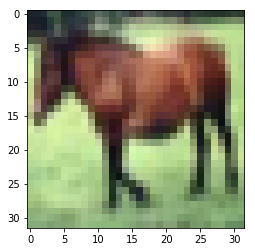

In [5]:
#指定したラベルのインデックスを取得する
tmp  = np.where(y_train==7)[0][0]

plt.imshow(x_train[tmp])

### ＜画像をまとめて表示＞

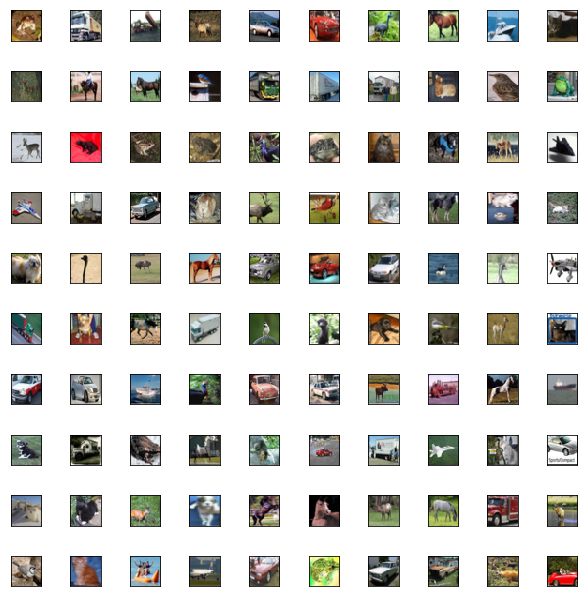

In [6]:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((32, 32,3)), cmap='gray')

## ５　前処理

### ＜大きさ（画像サイズ、分類する数、入力データの形状）の取得＞

In [7]:
img_rows = x_train[0].shape[1] #画像サイズを取得しておく
img_cols = x_train[0].shape[0]
num_classes = 10 # 分類する数を取得
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
input_shape = x_train.shape[1:4]# 入力データの形状を取得

### ＜正規化＞

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### ＜one-hot表現への変換＞

In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## ６　CNNの実装

### ＜モデルを作成＞

### モデルは、LeNetとAlexNetをepoch数を３として学習結果を比較検討する。その結果、テストデータに対する精度が高い方のモデルで、最終的にepoch数を１０として学習し、テストデータに対する精度を算定することとする。

In [10]:
# ＜LeNet（epoch：３）＞

model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5),
                 strides=(1, 1),
                 padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),
                      strides=(2,2),
                      padding='valid'))
model.add(Conv2D(16, kernel_size=(5, 5),
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),
                      strides=(2,2),
                      padding='valid'))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=3,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 29s 580us/step - loss: 1.8522 - acc: 0.3316 - val_loss: 1.4893 - val_acc: 0.4717
Epoch 2/3
50000/50000 [==============================] - 27s 535us/step - loss: 1.4101 - acc: 0.4986 - val_loss: 1.3316 - val_acc: 0.5157
Epoch 3/3
10000/10000 [==============================] - 3s 283us/step
Test loss: 1.2213539279937744
Test accuracy: 0.5666


In [11]:
# ＜AlexNet(epoch:3)＞

model = Sequential()
model.add(Conv2D(96, kernel_size=(11, 11),
                 strides=(4, 4),
                 padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3),
                      strides=(2,2),
                      padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(5, 5),
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),
                      strides=(2,2),
                      padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(384, kernel_size=(3, 3),
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3),
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3),
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3),
                      strides=(2,2),
                      padding='same'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=3,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 256s 5ms/step - loss: 1.8471 - acc: 0.3100 - val_loss: 2.5067 - val_acc: 0.2988
Epoch 2/3
50000/50000 [==============================] - 256s 5ms/step - loss: 1.4688 - acc: 0.4555 - val_loss: 1.7046 - val_acc: 0.3801
Epoch 3/3
10000/10000 [==============================] - 5s 512us/step
Test loss: 1.5811329118728639
Test accuracy: 0.4287


### LeNetの方が、epoch数が３の場合に、テストデータに対する精度が高いので、以下で同モデルによりepoch数を１０としてテストデータに対する精度を算定する。

In [12]:
# ＜LeNet（epoch：１０）＞

model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5),
                 strides=(1, 1),
                 padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),
                      strides=(2,2),
                      padding='valid'))
model.add(Conv2D(16, kernel_size=(5, 5),
                 strides=(1, 1),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),
                      strides=(2,2),
                      padding='valid'))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 29s 576us/step - loss: 1.8625 - acc: 0.3270 - val_loss: 1.7306 - val_acc: 0.4071
Epoch 2/10
50000/50000 [==============================] - 28s 569us/step - loss: 1.4196 - acc: 0.4921 - val_loss: 1.3255 - val_acc: 0.5276
Epoch 3/10
50000/50000 [==============================] - 28s 560us/step - loss: 1.2407 - acc: 0.5584 - val_loss: 1.2359 - val_acc: 0.5547
Epoch 4/10
50000/50000 [==============================] - 1850s 37ms/step - loss: 1.1328 - acc: 0.5961 - val_loss: 1.1556 - val_acc: 0.5870
Epoch 5/10
50000/50000 [==============================] - 890s 18ms/step - loss: 1.0466 - acc: 0.6278 - val_loss: 1.1156 - val_acc: 0.6045
Epoch 6/10
50000/50000 [==============================] - 29s 575us/step - loss: 0.9732 - acc: 0.6542 - val_loss: 1.1200 - val_acc: 0.6113
Epoch 7/10
50000/50000 [==============================] - 28s 559us/step - loss: 0.9080 - acc: 0.6787 - val_loss: 1